In [45]:
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
sys.path.append("..")
from solvers.ga.ga_solver import GeneticAlgorithmSolver
from problem.sudoku_manager import Sudoku, generate_boards
from time import perf_counter
from statistics import mean

In [46]:
params = {
  "seed": 211,
  "test_id": 14,
  "start_id": 34,
  "num_of_runs": 3,
  "num_of_sudokus": 3,
  "sudoku_level": "medium",
  "pop_size": 500,
  "pc": 0.7,
  "pm": 0.11,
  "max_epoch": 1500,
  "reset_cond": 150,
  "succ_rate": 0.99,
  "if_candidates": False
}

In [47]:
sudokus_range = range(params["start_id"], params["start_id"] + params["num_of_sudokus"])

suds_easy = [Sudoku('easy', id) for id in sudokus_range]
suds_medium = [Sudoku('medium', id) for id in sudokus_range]
suds_hard = [Sudoku('hard', id) for id in sudokus_range]

In [48]:
solver = GeneticAlgorithmSolver(
    pop_size=params['pop_size'],
    pc=params['pc'],
    pm=params['pm'],
    max_epoch=params['max_epoch'],
    reset_condition_val=params['reset_cond'],
    succession_rate=params['succ_rate'],
    seed=params['seed'],
)

In [49]:
def test_ga_solver(solver, sudokus, candidates):
    best_chrom_list = []
    best_scores_list = []
    best_per_iters = []
    exec_times = []
    for i in range(params['num_of_sudokus']):
        print(f"Sudoku to solve:\n{sudokus[i].board}\n")
        for j in range(params['num_of_runs']):
            start_time = perf_counter()
            results = solver.solve(sudoku=sudokus[i], is_candidate_mode=candidates)
            exec_times.append(perf_counter() - start_time)
            best_chrom_list.append(results[0])
            best_scores_list.append(results[1])
            best_per_iters.append(results[2])
    return best_chrom_list, best_scores_list, best_per_iters, exec_times

In [50]:
best_chroms, best_scores, best_per_iters, exec_times = test_ga_solver(solver, suds_easy, candidates=params['if_candidates'])

Sudoku to solve:
[[9 2 0 0 0 0 0 0 0]
 [1 3 8 0 0 0 4 6 7]
 [7 6 5 0 0 4 0 0 0]
 [0 0 0 0 8 6 0 0 5]
 [3 8 6 0 5 7 0 0 9]
 [4 0 0 2 1 9 0 8 0]
 [0 9 0 0 6 0 0 0 0]
 [5 0 0 7 9 0 6 0 0]
 [0 7 3 8 4 2 0 5 1]]

Improvement! Score: 211/243
Epoch: 0 best_global: 211/243, best_local: 211/243
Improvement! Score: 212/243
Epoch: 1 best_global: 212/243, best_local: 212/243
Improvement! Score: 216/243
Epoch: 2 best_global: 216/243, best_local: 216/243
Improvement! Score: 217/243
Epoch: 3 best_global: 217/243, best_local: 217/243
Epoch: 4 best_global: 217/243, best_local: 217/243
Epoch: 5 best_global: 217/243, best_local: 217/243
Epoch: 6 best_global: 217/243, best_local: 215/243
Epoch: 7 best_global: 217/243, best_local: 215/243
Epoch: 8 best_global: 217/243, best_local: 217/243
Improvement! Score: 220/243
Epoch: 9 best_global: 220/243, best_local: 220/243
Epoch: 10 best_global: 220/243, best_local: 219/243
Epoch: 11 best_global: 220/243, best_local: 218/243
Epoch: 12 best_global: 220/243, best_l

In [51]:
best_scores

[237, 239, 239, 243, 243, 241, 239, 241, 237]

In [52]:
MAX_STEPS = max([len(bests) for bests in best_per_iters])
avg_steps = mean([len(bests) for bests in best_per_iters])

In [53]:
def normalize_arr(arr):
    if arr.shape[0] == MAX_STEPS:
      return arr
    else:
      norm_arr = np.zeros((MAX_STEPS,))
      norm_arr[:len(arr)] = arr
      norm_arr[len(arr):] = max(arr)
      return norm_arr

In [54]:
def normalize_best_per_iters(best_per_iters):
    best_iters_avg = []
    best_iters_max = []
    best_iters_min = []
    normalized_best_iters = np.array([normalize_arr(bests) for bests in best_per_iters])
    for i in range(normalized_best_iters.shape[1]):
        best_iters_avg.append(mean(normalized_best_iters[:, i]))
        best_iters_max.append(max(normalized_best_iters[:, i]))
        best_iters_min.append(min(normalized_best_iters[:, i]))
    return best_iters_avg, best_iters_max, best_iters_min

In [55]:
best_per_iters_avg, best_per_iters_max, best_per_iters_min = normalize_best_per_iters(best_per_iters)

In [56]:
avg_best_score = mean(best_scores)
avg_best_score

239

In [57]:
avg_exec_time = mean(exec_times)
avg_exec_time

173.36046612555543

In [58]:
params_text = "pop_size={}, pc={}, pm={}, reset_cond={}, succ_rate={}, candidates={}".format(
                params["pop_size"],
                params["pc"],
                params["pm"],
                params["reset_cond"],
                params["succ_rate"],
                params["if_candidates"],
            )

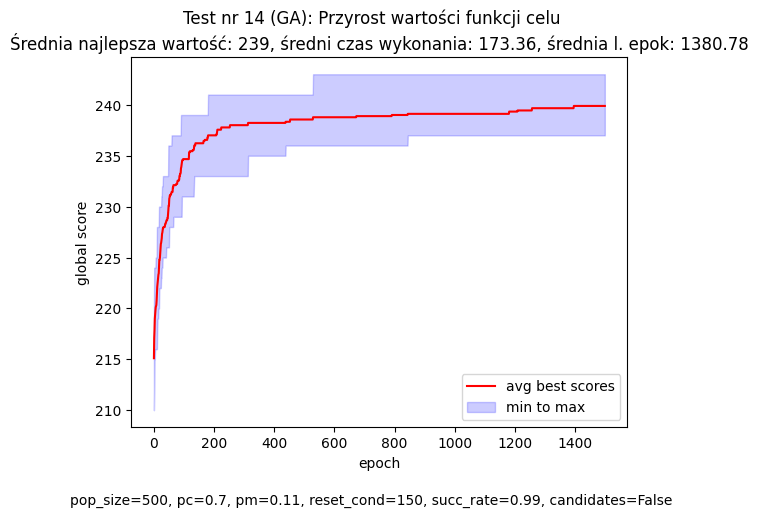

In [61]:
plt.figure()
plt.fill_between(range(MAX_STEPS), best_per_iters_min, best_per_iters_max, color='b', alpha=0.2, label='min to max')
plt.plot(range(MAX_STEPS), (best_per_iters_avg), 'r', label='avg best scores')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('global score')
plt.suptitle('Test nr {} (GA): Przyrost wartości funkcji celu'.format(params['test_id']))
plt.title('Średnia najlepsza wartość: {}, średni czas wykonania: {:.2f}, średnia l. epok: {:.2f}'.format(avg_best_score, avg_exec_time, avg_steps))
plt.figtext(0.5, -0.05, params_text, wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig("../../results/plots/ga/test_ga_nr_{}.png".format(params['test_id']), bbox_inches="tight")
plt.show()

In [60]:
with open("../../results/params/ga/test_ga_nr_{}.json".format(params['test_id']), "w") as write_file:
    json.dump(params, write_file, indent=4)